# 0. База Астрологи

In [269]:
import pandas as pd

# База астрологи
ASTRO = pd.read_spss('ASTROLOGY.sav')
ASTRO.head()

,ID,SEX,AGE,FO,TIP,astr1_1,astr1_2,astr1_3,astr1_4,astr1_5,...,вера_в_колдовство,вера_в_пересел_душ,не_верю_в_сверхъест,возраст_группы,город_село,интернет,тв,индекс_медиапотреб,населен_пункт,инд_вариативности_сверхъест
0,07246fad688ce8ea,Женский,76.0,Сибирский федеральный округ,Город с численностью от 100 тысяч до 500 тысяч,Не верю ни в какие сверхъестественные силы и я...,NaN,NaN,NaN,NaN,...,нет,нет,да,NaN,город,NaN,4.0,NaN,5.0,0.0
1,072470db1e8ceddf,Мужской,34.0,Сибирский федеральный округ,Город с численностью жителей миллион и более ч...,Не верю ни в какие сверхъестественные силы и я...,NaN,NaN,NaN,NaN,...,нет,нет,да,NaN,город,5.0,NaN,NaN,7.0,0.0
2,0724718c060ce072,Мужской,70.0,Сибирский федеральный округ,Город с численностью от 100 тысяч до 500 тысяч,В Бога,NaN,NaN,NaN,NaN,...,нет,нет,нет,NaN,город,4.0,5.0,9.0,5.0,1.0
3,072473ffb98cea14,Мужской,68.0,Сибирский федеральный округ,Город с численностью от 50 тысяч до 100 тысяч,В Бога,NaN,NaN,NaN,NaN,...,нет,нет,нет,NaN,город,5.0,3.0,8.0,4.0,1.0
4,07247451044cebc5,Мужской,70.0,Сибирский федеральный округ,Город с численностью жителей миллион и более ч...,В судьбу,NaN,NaN,NaN,NaN,...,нет,нет,нет,NaN,город,NaN,5.0,NaN,7.0,0.0


# 0.1 База Астрологи

Разделение на возрастные группы

In [263]:
import matplotlib.pyplot as plt
import os

gen_z = [] # 18-24
gen_m = [] # 45-59

for index, row in ASTRO.iterrows():
    age = row['AGE']
    if(age >= 18 and age <= 24): gen_z.append(ASTRO.iloc[index])
    elif(age >= 45 and age <= 59):  gen_m.append(ASTRO.iloc[index])

gen_z = pd.DataFrame(data = gen_z)
gen_m = pd.DataFrame(data = gen_m)

# 0.2 База Астрологи

Портрет люди от 18 до 24

<AxesSubplot:xlabel='Пропорция', ylabel='Во что верю'>

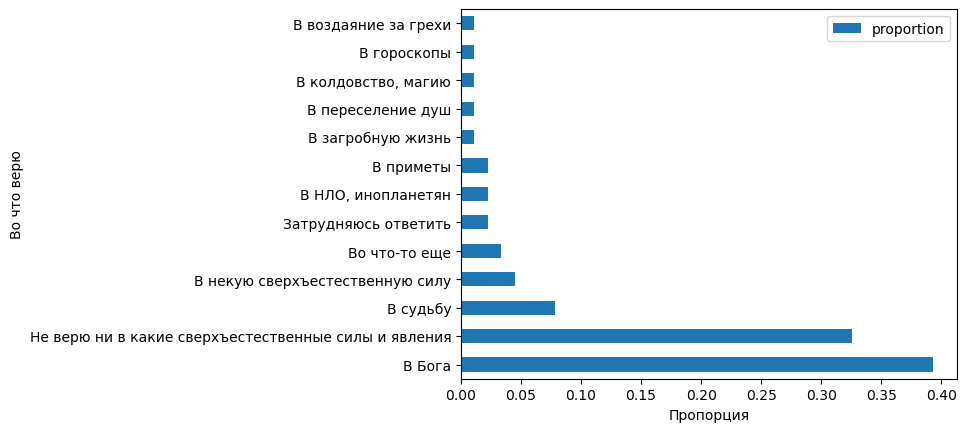

In [388]:
count_belief = pd.DataFrame(data=gen_z.astr1_1.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Во что верю')

<AxesSubplot:xlabel='Пропорция', ylabel='Смотрят ли телевизор?'>

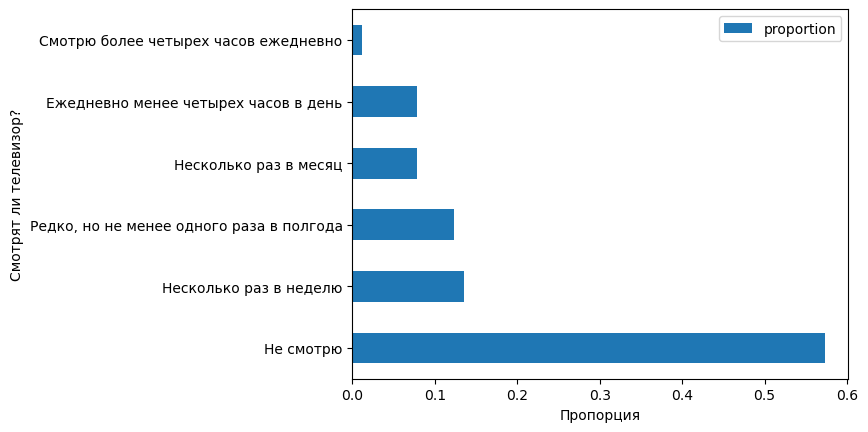

In [389]:
count_belief = pd.DataFrame(data=gen_z.TV.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Смотрят ли телевизор?')

<AxesSubplot:xlabel='Пропорция', ylabel='Какое у вас образование?'>

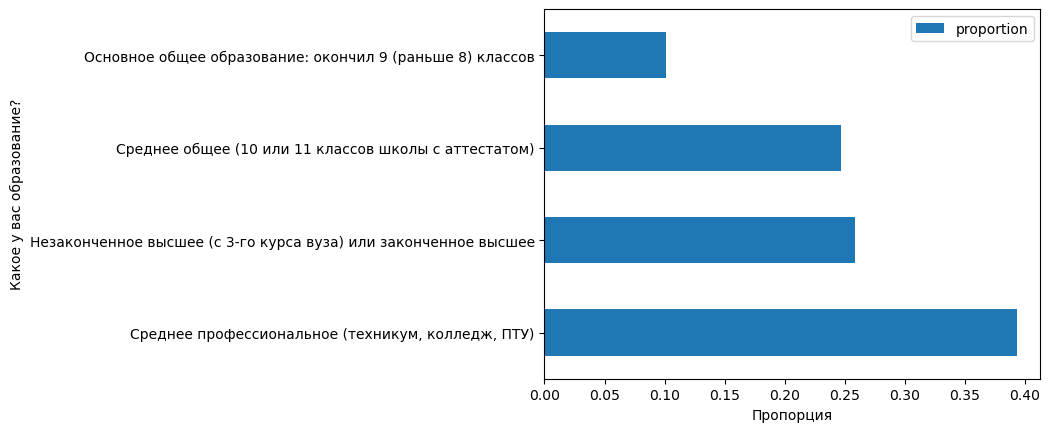

In [391]:
count_belief = pd.DataFrame(data=gen_z.EDU.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Какое у вас образование?')

<AxesSubplot:xlabel='Пропорция', ylabel='Пользуются ли интернетом?'>

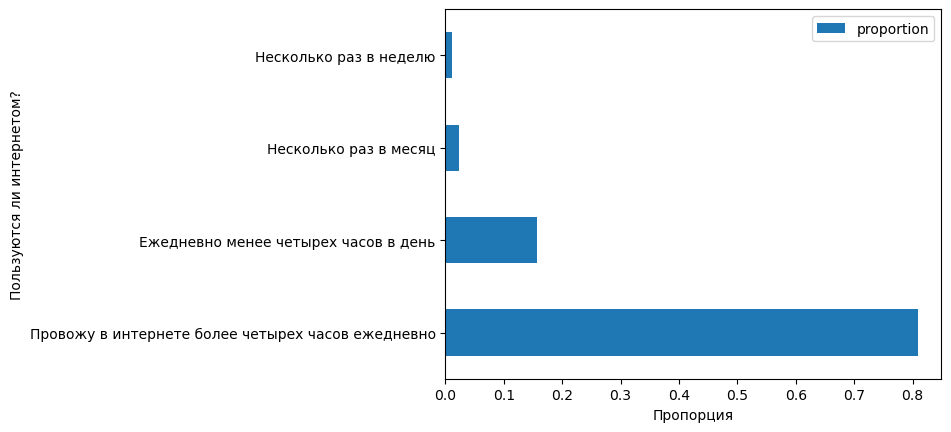

In [392]:
count_belief = pd.DataFrame(data=gen_z.d1.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пользуются ли интернетом?')

<AxesSubplot:xlabel='Пропорция', ylabel='Доход'>

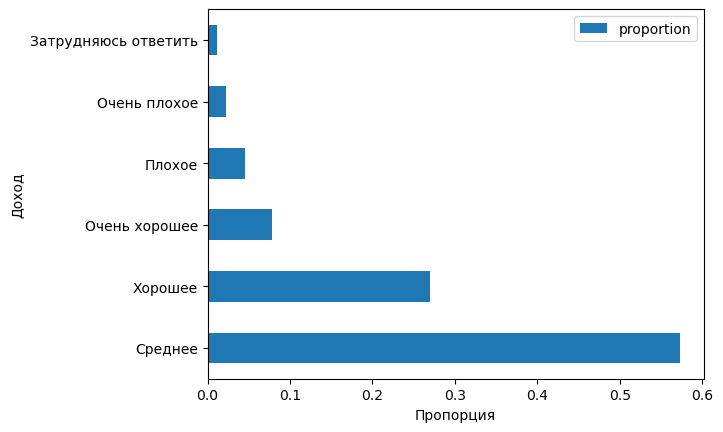

In [393]:
count_belief = pd.DataFrame(data=gen_z.DOHOD_0.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Доход')

# 0.3 База Астрологи

Портрет люди от 45-59

<AxesSubplot:xlabel='Пропорция', ylabel='Во что верю'>

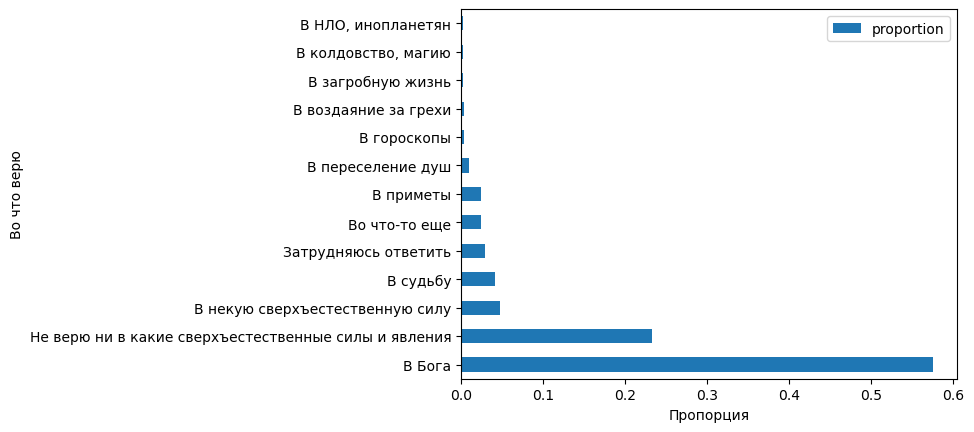

In [394]:
count_belief2 = pd.DataFrame(data=gen_m.astr1_1.value_counts(normalize=True))

count_belief2.plot(kind='barh', xlabel='Пропорция', ylabel = 'Во что верю')

<AxesSubplot:xlabel='Пропорция', ylabel='Смотрят ли телевизор?'>

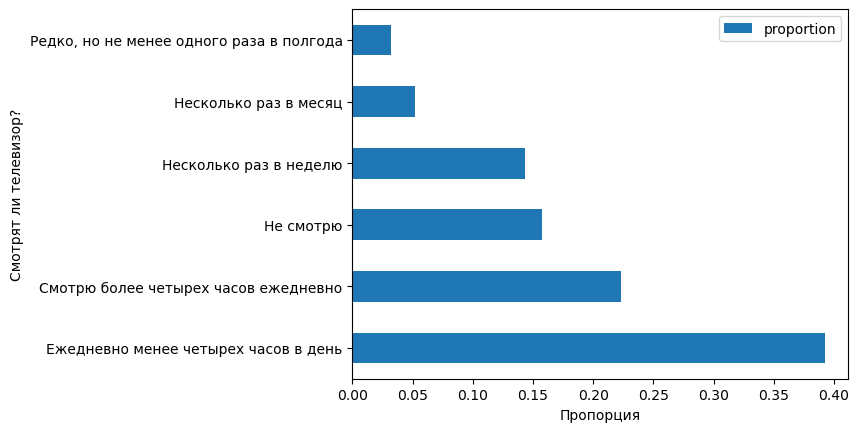

In [396]:
count_belief = pd.DataFrame(data=gen_m.TV.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Смотрят ли телевизор?')

<AxesSubplot:xlabel='Пропорция', ylabel='Какое у вас образование?'>

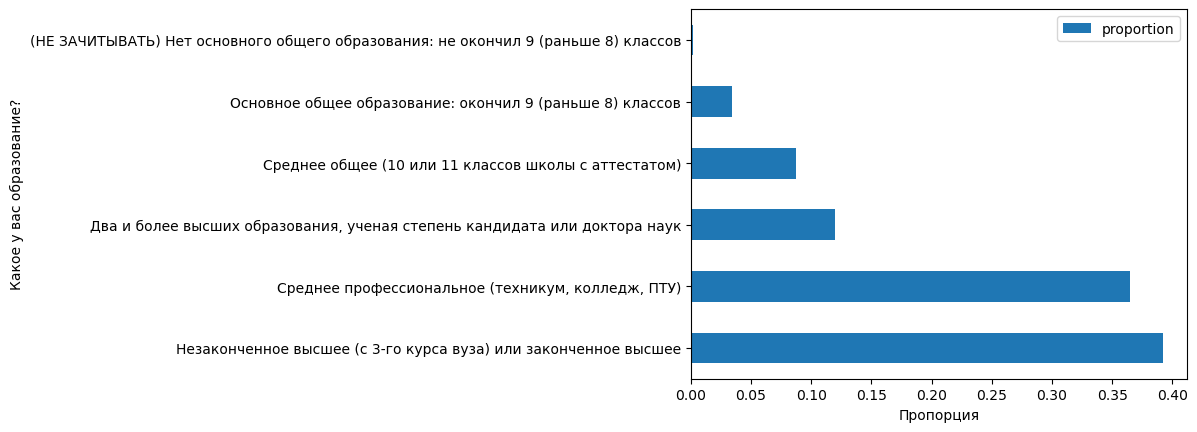

In [397]:
count_belief = pd.DataFrame(data=gen_m.EDU.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Какое у вас образование?')

<AxesSubplot:xlabel='Пропорция', ylabel='Пользуются ли интернетом?'>

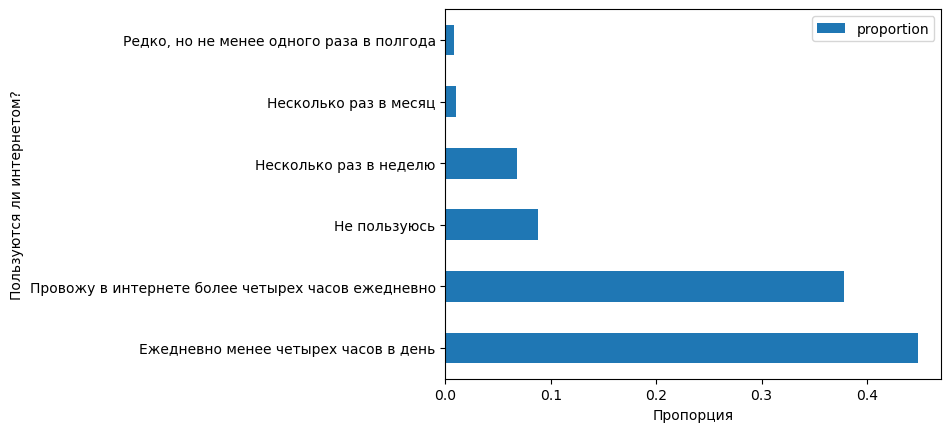

In [398]:
count_belief = pd.DataFrame(data=gen_m.d1.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пользуются ли интернетом?')

<AxesSubplot:xlabel='Пропорция', ylabel='Доход'>

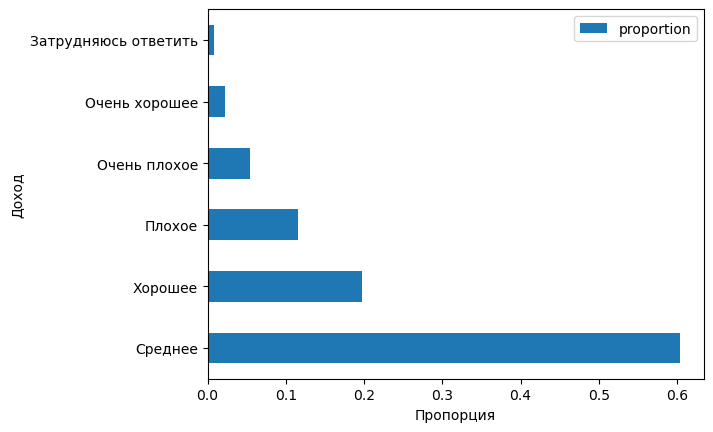

In [399]:
count_belief = pd.DataFrame(data=gen_m.DOHOD_0.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Доход')

# 0.4 База Астрологи

Какое образование у тех кто верит в гороскопы и магию (от 18 до 24)

0724a8e1b18ce6c2
0724c7fd4d8ce001


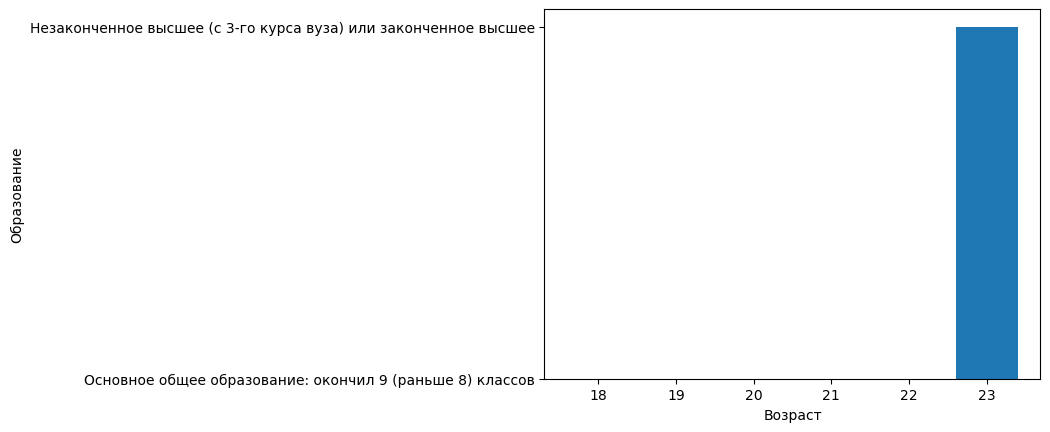

In [30]:
gen_z_esoterics = []

for index, row in gen_z.iterrows():
    ans = row['astr1_1']
    if(ans == 'В гороскопы' or ans == 'В колдовство, магию'): 
        gen_z_esoterics.append(row)

gen_z_esoterics = pd.DataFrame(data = gen_z_esoterics)

fig, ax = plt.subplots()
ax.bar(gen_z_esoterics['AGE'], gen_z_esoterics['EDU'])
ax.xaxis.set_label('Возраст')

plt.xlabel('Возраст')
plt.ylabel("Образование")

plt.show()


# 0.5 База Астрологи

Какое образование у тех кто верит в гороскопы и магию (от 45 до 59)

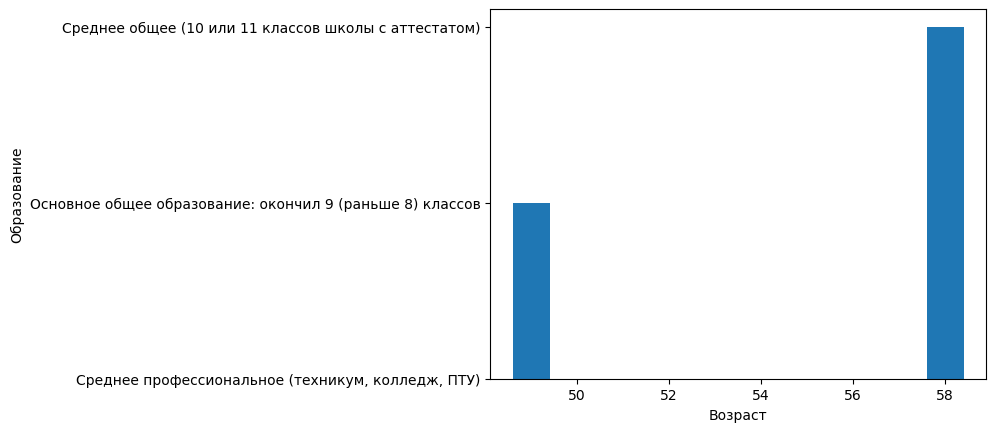

In [31]:
gen_m_esoterics = []

for index, row in gen_m.iterrows():
    ans = row['astr1_1']
    if(ans == 'В гороскопы' or ans == 'В колдовство, магию'): 
        gen_m_esoterics.append(row)

gen_m_esoterics = pd.DataFrame(data = gen_m_esoterics)

fig, ax = plt.subplots()
ax.bar(gen_m_esoterics['AGE'], gen_m_esoterics['EDU'])
ax.xaxis.set_label('Возраст')

plt.xlabel('Возраст')
plt.ylabel("Образование")

plt.show()

# 1. База Мистика

In [33]:
# База мистики
MYSTICS = pd.read_spss('MYSTICISM.sav')
MYSTICS.head()

,ID,SEX,AGE,FO,TIP,hl1,hl2,hl3,hl4,TV,...,PROF3,weight1,тв_потребление,интернет_потребление,индекс_медиа_потреб,hl1_,hl2_,hl3_,hl4_,индекс_эзотерич_вера
0,04add85a3e4ce6b7,Мужской,88.0,Сибирский федеральный округ,Город с численностью жителей миллион и более ч...,Трудно сказать определенно,Не верю,Не верю,Трудно сказать определенно,Смотрю более четырех часов ежедневно,...,NaN,4.151922,5.0,NaN,NaN,0.5,0.0,0.0,0.5,1.0
1,04adec5fb6cce3d5,Женский,90.0,Центральный федеральный округ,Село,Трудно сказать определенно,Трудно сказать определенно,Верю,Трудно сказать определенно,Ежедневно менее четырех часов в день,...,NaN,0.618550,4.0,NaN,NaN,0.5,0.5,1.0,0.5,2.5
2,04adc0f8768ce211,Женский,85.0,Дальневосточный федеральный округ,Село,Трудно сказать определенно,Не верю,Не верю,Верю,Смотрю более четырех часов ежедневно,...,NaN,1.004877,5.0,NaN,NaN,0.5,0.0,0.0,1.0,1.5
3,04ae2418b3cce61e,Женский,85.0,Северо-Кавказский федеральный округ,Город с численностью от 100 тысяч до 500 тысяч,Трудно сказать определенно,Трудно сказать определенно,Трудно сказать определенно,Трудно сказать определенно,Ежедневно менее четырех часов в день,...,NaN,0.549627,4.0,NaN,NaN,0.5,0.5,0.5,0.5,2.0
4,04adc78e448ce164,Мужской,86.0,Южный федеральный округ,Город с численностью от 50 тысяч до 100 тысяч,Не верю,Не верю,Не верю,Не верю,Смотрю более четырех часов ежедневно,...,NaN,0.392132,5.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0


# 1.1 База Мистики

Корреляция между уровнем медиа потребления ТВ и уровнем веры в различные эзотерические практики 

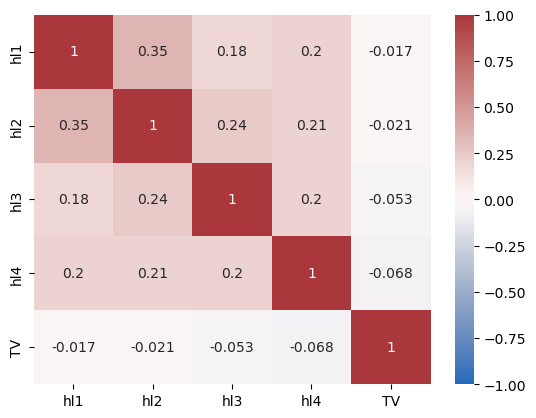

In [183]:
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
media_and_rel = MYSTICS.iloc[:, 5:10]

# def replace_values_in_column(series, column_name, src_val, replace_val):
#     series[column_name] = series[column_name].replace(src_val, replace_val)

# Заменим на числовые значения
media_and_rel['TV'] = media_and_rel['TV'].replace('Смотрю более четырех часов ежедневно', 0.16)
media_and_rel['TV'] = media_and_rel['TV'].replace('Ежедневно менее четырех часов в день', 0.32)
media_and_rel['TV'] = media_and_rel['TV'].replace('Несколько раз в неделю', 0.48)
media_and_rel['TV'] = media_and_rel['TV'].replace('Несколько раз в месяц', 0.64)
media_and_rel['TV'] = media_and_rel['TV'].replace('Редко, но не менее одного раза в полгода', 0.8)
media_and_rel['TV'] = media_and_rel['TV'].replace('Не смотрю', 1)

media_and_rel['hl1'] = media_and_rel['hl1'].replace('Верю', 0.3)
media_and_rel['hl1'] = media_and_rel['hl1'].replace('Не верю', 0.6)
media_and_rel['hl1'] = media_and_rel['hl1'].replace('Трудно сказать определенно', 1.0)

media_and_rel['hl2'] = media_and_rel['hl2'].replace('Верю', 0.3)
media_and_rel['hl2'] = media_and_rel['hl2'].replace('Не верю', 0.6)
media_and_rel['hl2'] = media_and_rel['hl2'].replace('Трудно сказать определенно', 1.0)

media_and_rel['hl3'] = media_and_rel['hl3'].replace('Верю', 0.3)
media_and_rel['hl3'] = media_and_rel['hl3'].replace('Не верю', 0.6)
media_and_rel['hl3'] = media_and_rel['hl3'].replace('Трудно сказать определенно', 1.0)

media_and_rel['hl4'] = media_and_rel['hl4'].replace('Верю', 0.3)
media_and_rel['hl4'] = media_and_rel['hl4'].replace('Не верю', 0.6)
media_and_rel['hl4'] = media_and_rel['hl4'].replace('Трудно сказать определенно', 1.0)

matrix = media_and_rel.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()


# 2.0 База РМЭС

In [151]:
# База астрологи
RMES = pd.read_spss('RMES.sav')
RMES.head()

,aa_inwgt,region,psu,status,popul,aa_marst,aa_occup08,aa_int_y,aa_diplom,aa_age,...,aan31.1,aan31.2,aan31.3,пол,отн_религ,статус_индекс,воцерк_индекс,возраст_группы,инд_нестабильности,инд_неудовлетворенности
0,0.746202,"Ленинградская область, Волосовский район",Волосовский р-н: Ленинградская область,ПГТ,11900.0,Никогда в браке не состояли,NaN,2022.0,незаконченное среднее образование (7 - 8 кл) +...,78.0,...,NaN,NaN,NaN,жен,4.0,13.0,8.0,NaN,NaN,6.0
1,0.746202,"Ленинградская область, Волосовский район",Волосовский р-н: Ленинградская область,ПГТ,11900.0,Bдовец (вдова),NaN,2022.0,законченное среднее специальное образование,76.0,...,NaN,NaN,NaN,жен,5.0,11.0,10.0,NaN,NaN,6.0
2,0.746202,"Ленинградская область, Волосовский район",Волосовский р-н: Ленинградская область,ПГТ,11900.0,"ОФИЦИАЛЬНО ЗАРЕГИСТРИРОВАНЫ, НО ВМЕСТЕ НЕ ПРОЖ...",неквалифицированные рабочие всех отраслей,2022.0,незаконченное среднее образование (7 - 8 кл),68.0,...,NaN,NaN,NaN,жен,4.0,14.0,5.0,NaN,12.0,9.0
3,0.900645,"Ленинградская область, Волосовский район",Волосовский р-н: Ленинградская область,ПГТ,11900.0,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",2022.0,законченное среднее образование,54.0,...,NaN,Нет,NaN,жен,4.0,NaN,8.0,45-59,12.0,8.0
4,0.797517,"Ленинградская область, Волосовский район",Волосовский р-н: Ленинградская область,Село,2800.0,Состоите в зарегистрированном браке,NaN,2022.0,законченное среднее образование,64.0,...,NaN,NaN,NaN,жен,5.0,14.0,6.0,NaN,NaN,7.0


# 2.1 База РМЭС

Значимость факторов с помощью абстрактного леса

! НЕТОЧНЫЙ МЕТОД

       воцерк_индекс  отн_религ
10               8.0        4.0
11               5.0        4.0
12               5.0        4.0
16               9.0        5.0
17               6.0        4.0
...              ...        ...
11919            7.0        5.0
11926           10.0        5.0
11932            8.0        5.0
11973            9.0        5.0
11974            9.0        5.0

[1340 rows x 2 columns]
Elapsed time to compute the importances: 0.023 seconds


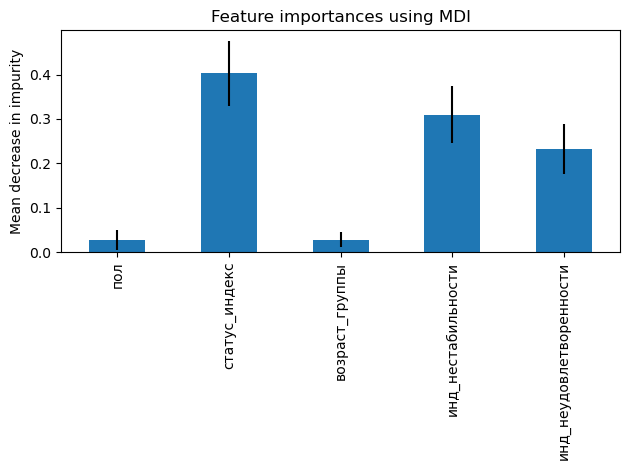

In [204]:
from sklearn import datasets

import pandas as pd

data = RMES[['пол', 'отн_религ', 'статус_индекс', 'воцерк_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']].copy()

data['пол'] = data['пол'].replace('муж', 1)
data['пол'] = data['пол'].replace('жен', 0)

data['возраст_группы'] = data['возраст_группы'].replace('45-59', 1)
data['возраст_группы'] = data['возраст_группы'].replace('18-24', 0)

data=pd.DataFrame(data=data)
data = data.dropna()

from sklearn.model_selection import train_test_split

X = data[['пол', 'статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']]
y = data[['воцерк_индекс', 'отн_религ']]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(f"Точность предсказания: {clf.score(X_test, y_test)}")
import time

import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

feature_names = ['пол', 'статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 2.1 База РМЭС

Значимость факторов (второй споспоб) с помощью абстрактного леса

Проверяем влияение на ОТНОШЕНИЕ К РЕЛИГИИ

#### Как работает?

Произвольным образом переставить или перетасовать один столбец в наборе датасета валидации, оставив все остальные столбцы нетронутыми. Признак считается «важным», если точность модели падает и его изменение вызывает увеличение ошибок. С другой стороны, признак считается «неважным», если перетасовка его значений не влияет на точность модели.

Чем выше бар на графике тем выше точность модели при перетасовке этого признака 

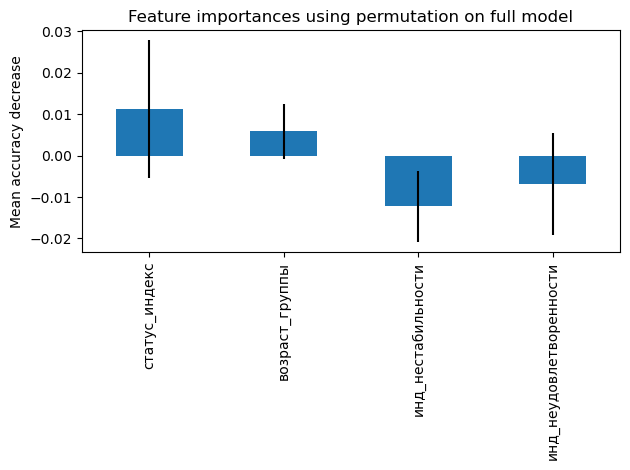

In [214]:
from sklearn import datasets
from sklearn.inspection import permutation_importance

import pandas as pd

data = RMES[['пол', 'отн_религ', 'статус_индекс', 'воцерк_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']].copy()

data['пол'] = data['пол'].replace('муж', 1)
data['пол'] = data['пол'].replace('жен', 0)

data['возраст_группы'] = data['возраст_группы'].replace('45-59', 1)
data['возраст_группы'] = data['возраст_группы'].replace('18-24', 0)

data=pd.DataFrame(data=data)
data = data.dropna()

from sklearn.model_selection import train_test_split

X = data[['статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']]
y = data['отн_религ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(f"Точность предсказания: {clf.score(X_test, y_test)}")
import time

import numpy as np

start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time

import pandas as pd

feature_names = ['статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# 2.2 База РМЭС

Тоже самое но проверяем отношение в ВОЦЕРКВЛЁННОСТИ

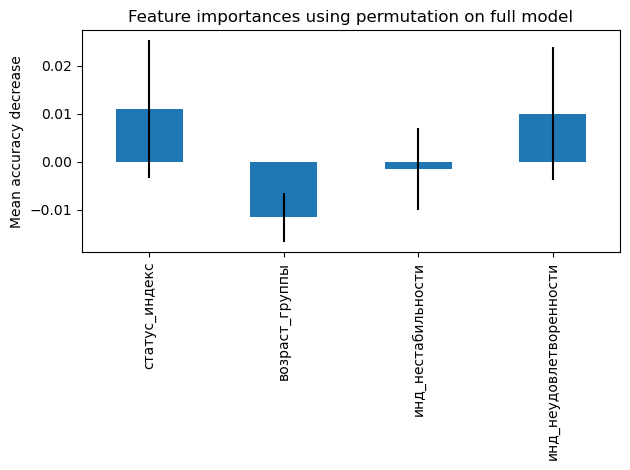

In [215]:
from sklearn import datasets
from sklearn.inspection import permutation_importance

import pandas as pd

data = RMES[['пол', 'отн_религ', 'статус_индекс', 'воцерк_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']].copy()

data['пол'] = data['пол'].replace('муж', 1)
data['пол'] = data['пол'].replace('жен', 0)

data['возраст_группы'] = data['возраст_группы'].replace('45-59', 1)
data['возраст_группы'] = data['возраст_группы'].replace('18-24', 0)

data=pd.DataFrame(data=data)
data = data.dropna()

from sklearn.model_selection import train_test_split

X = data[['статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']]
y = data['воцерк_индекс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(f"Точность предсказания: {clf.score(X_test, y_test)}")
import time

import numpy as np

start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time

import pandas as pd

feature_names = ['статус_индекс', 'возраст_группы', 'инд_нестабильности', 'инд_неудовлетворенности']
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# 2.3 База РМЭЗ

Разделение на возрастные группы

In [445]:
import matplotlib.pyplot as plt
import os

gen_z_no_belief = [] 
gen_z_belief = []
gen_m_no_belief = []
gen_m_belief = [] 

for index, row in RMES.iterrows():
    age = row['aa_age']
    belief = row['aaj72.18']
    if(age >= 18 and age <= 24): 
        if(belief == 'Вы верующий человек' or belief == 'Вы скорее верующий, чем неверующий человек'):
            gen_z_belief.append(RMES.iloc[index])
        else:
            gen_z_no_belief.append(RMES.iloc[index])
    elif(age >= 45 and age <= 59):  
        if(belief == 'Вы верующий человек' or belief == 'Вы скорее верующий, чем неверующий человек'):
            gen_m_belief.append(RMES.iloc[index])
        else:
            gen_m_no_belief.append(RMES.iloc[index])

gen_z_no_belief = pd.DataFrame(data = gen_z_no_belief)
gen_z_belief = pd.DataFrame(data = gen_z_belief)
gen_m_no_belief = pd.DataFrame(data = gen_m_no_belief)
gen_m_belief = pd.DataFrame(data = gen_m_belief)

# 2.4 База РМЭЗ

Портрет верующих людей 18-24

<AxesSubplot:xlabel='Пропорция', ylabel='Пол'>

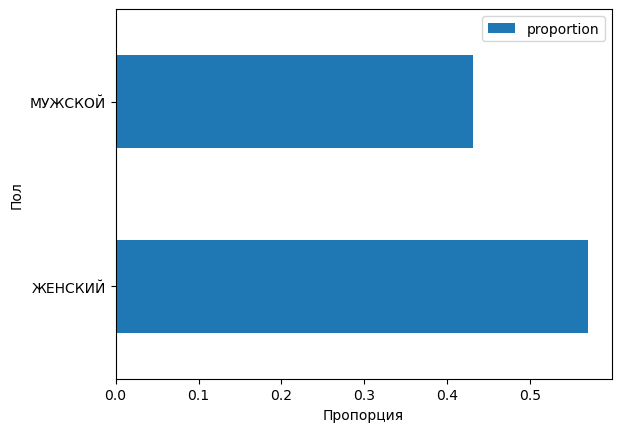

In [447]:
count_belief = pd.DataFrame(data=gen_z_belief.aah5.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пол')

<AxesSubplot:xlabel='Пропорция', ylabel='Образование'>

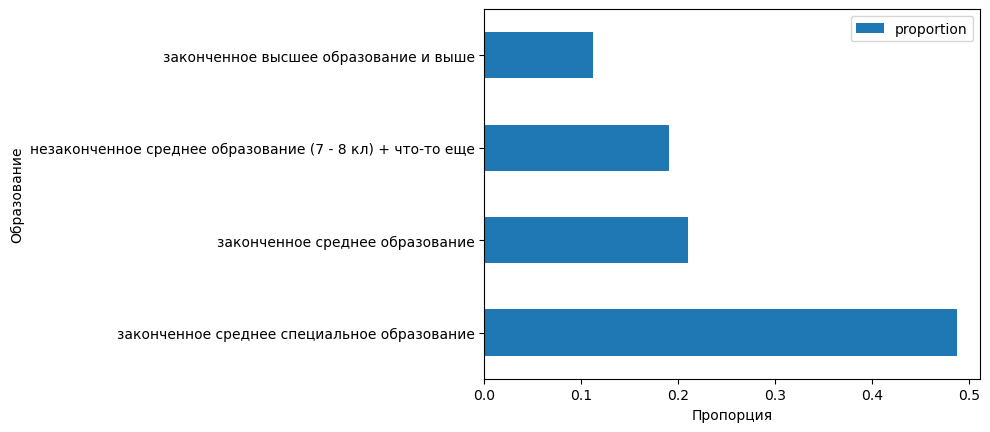

In [448]:
count_belief = pd.DataFrame(data=gen_z_belief.aa_diplom.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Тип населённого пункта'>

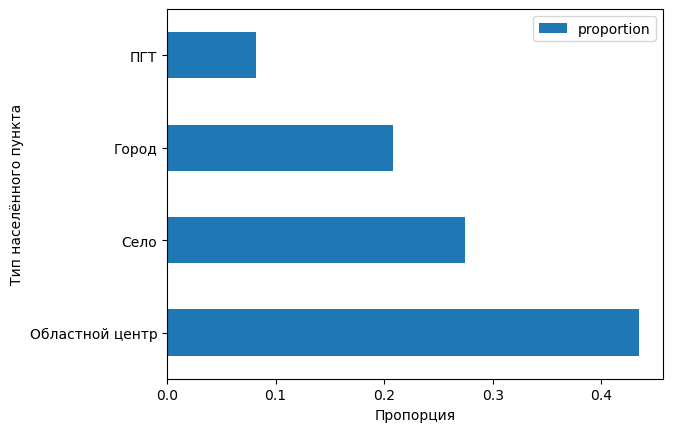

In [449]:
count_belief = pd.DataFrame(data=gen_z_belief.status.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Тип населённого пункта')

<AxesSubplot:xlabel='Пропорция', ylabel='Уровень образование'>

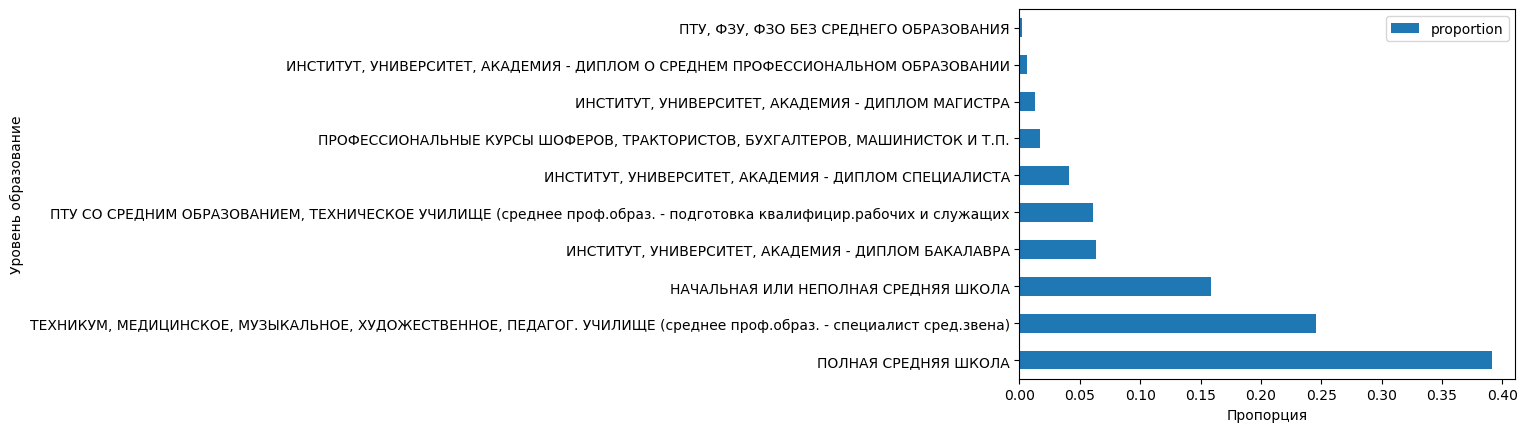

In [451]:
count_belief = pd.DataFrame(data=gen_z_belief['aaj72.18a'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Уровень образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Удовлетворённость доходом'>

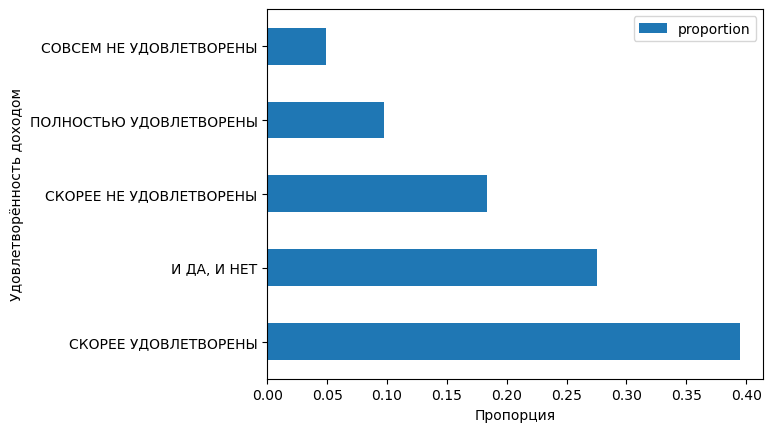

In [452]:
count_belief = pd.DataFrame(data=gen_z_belief['aaj1.1.3'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Удовлетворённость доходом')

# 2.5 База РМЭЗ

Портрет неверующих людей 18-24

<AxesSubplot:xlabel='Пропорция', ylabel='Пол'>

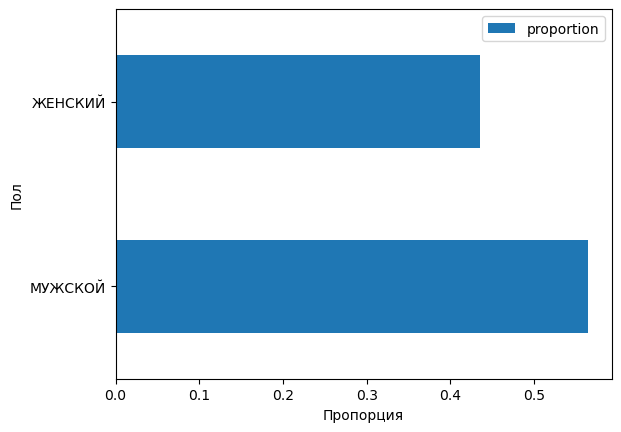

In [453]:
count_belief = pd.DataFrame(data=gen_z_no_belief.aah5.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пол')

<AxesSubplot:xlabel='Пропорция', ylabel='Образование'>

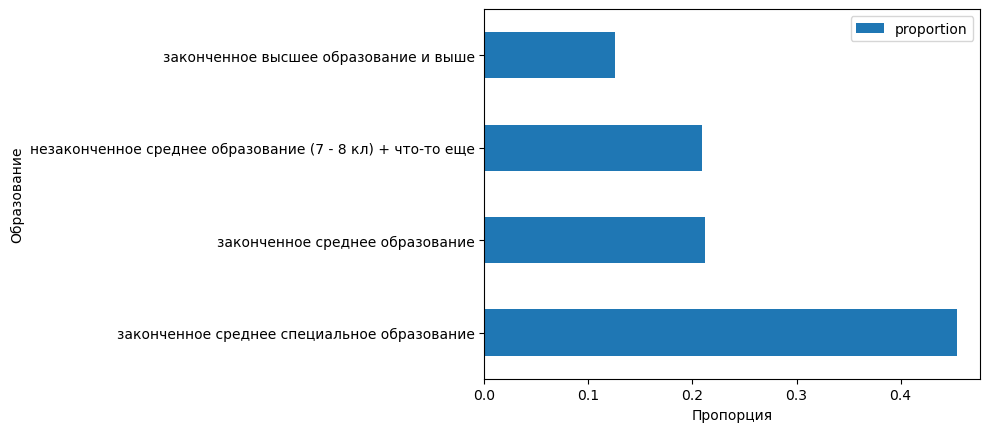

In [454]:
count_belief = pd.DataFrame(data=gen_z_no_belief.aa_diplom.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Тип населённого пункта'>

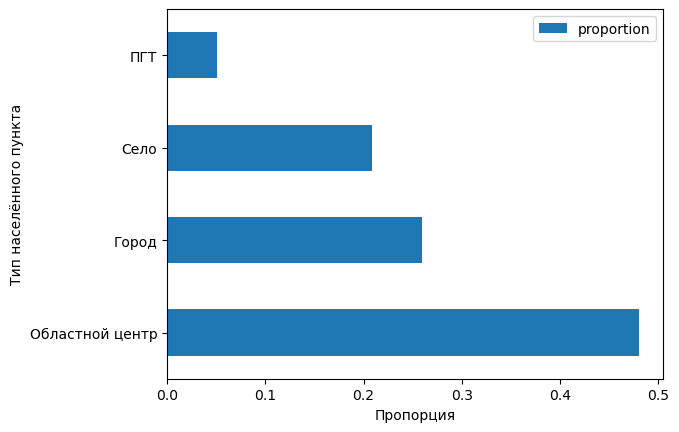

In [455]:
count_belief = pd.DataFrame(data=gen_z_no_belief.status.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Тип населённого пункта')

<AxesSubplot:xlabel='Пропорция', ylabel='Уровень образование'>

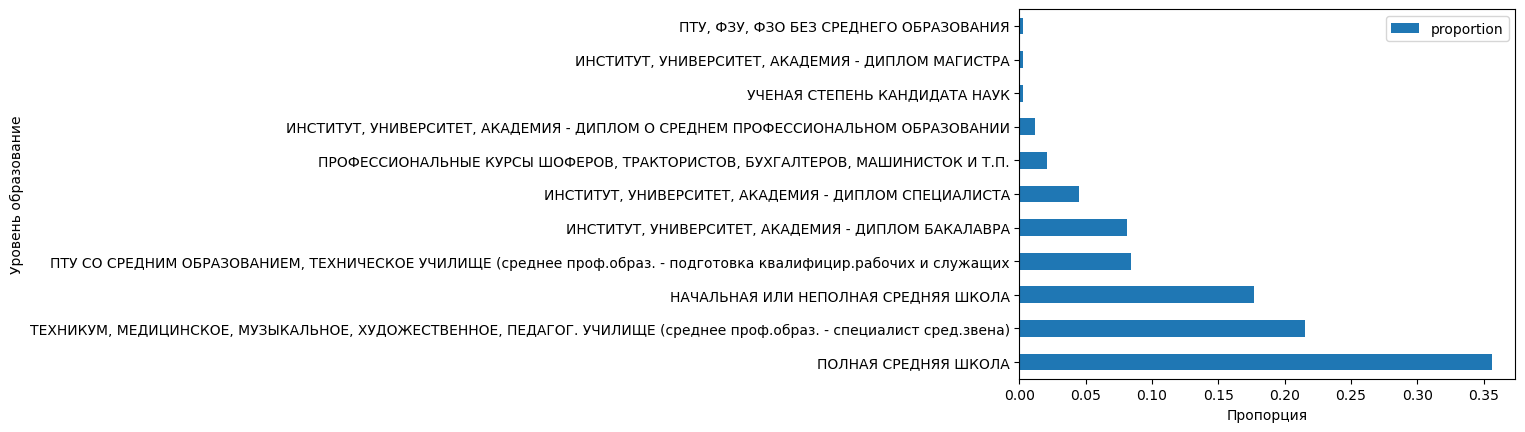

In [456]:
count_belief = pd.DataFrame(data=gen_z_no_belief['aaj72.18a'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Уровень образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Удовлетворённость доходом'>

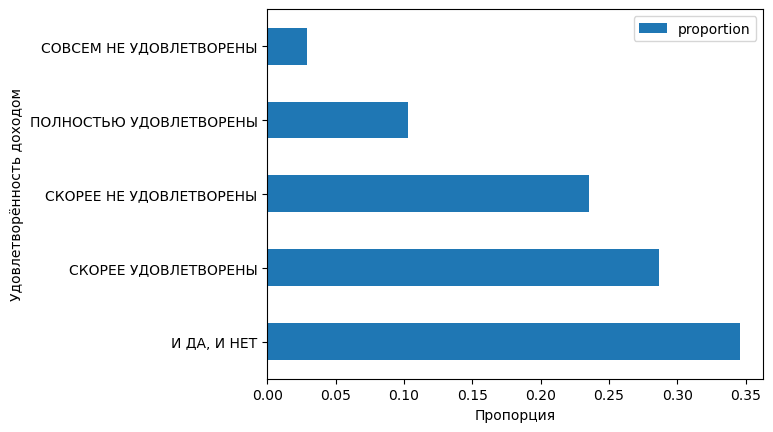

In [457]:
count_belief = pd.DataFrame(data=gen_z_no_belief['aaj1.1.3'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Удовлетворённость доходом')

# 2.6 База РМЭЗ

Портрет верующих людей 45-59

<AxesSubplot:xlabel='Пропорция', ylabel='Пол'>

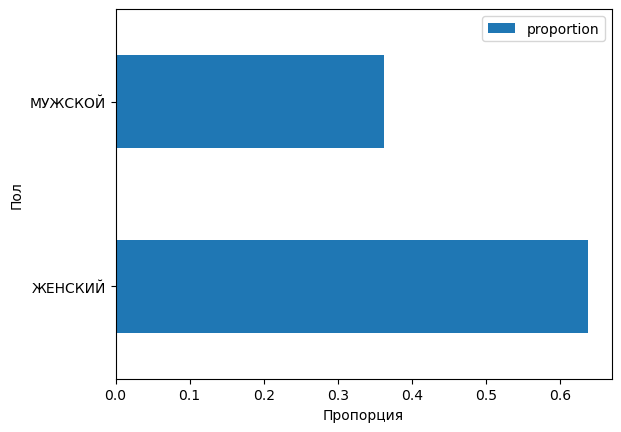

In [458]:
count_belief = pd.DataFrame(data=gen_m_belief.aah5.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пол')

<AxesSubplot:xlabel='Пропорция', ylabel='Образование'>

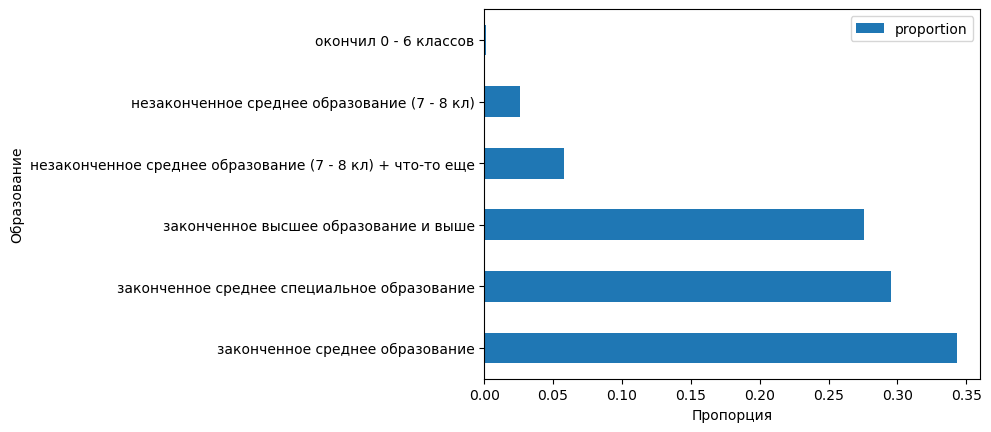

In [459]:
count_belief = pd.DataFrame(data=gen_m_belief.aa_diplom.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Тип населённого пункта'>

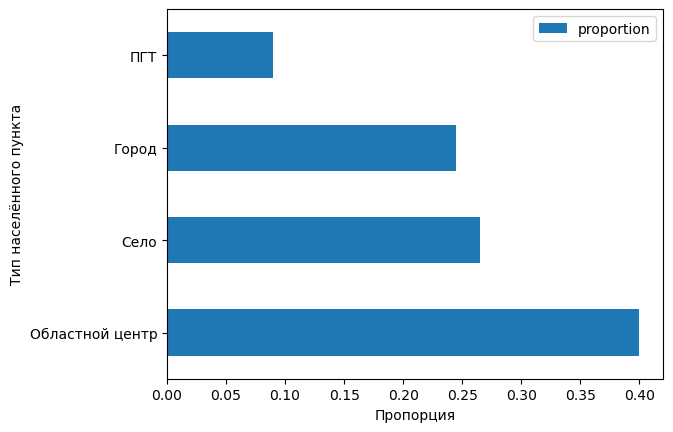

In [460]:
count_belief = pd.DataFrame(data=gen_m_belief.status.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Тип населённого пункта')

<AxesSubplot:xlabel='Пропорция', ylabel='Уровень образование'>

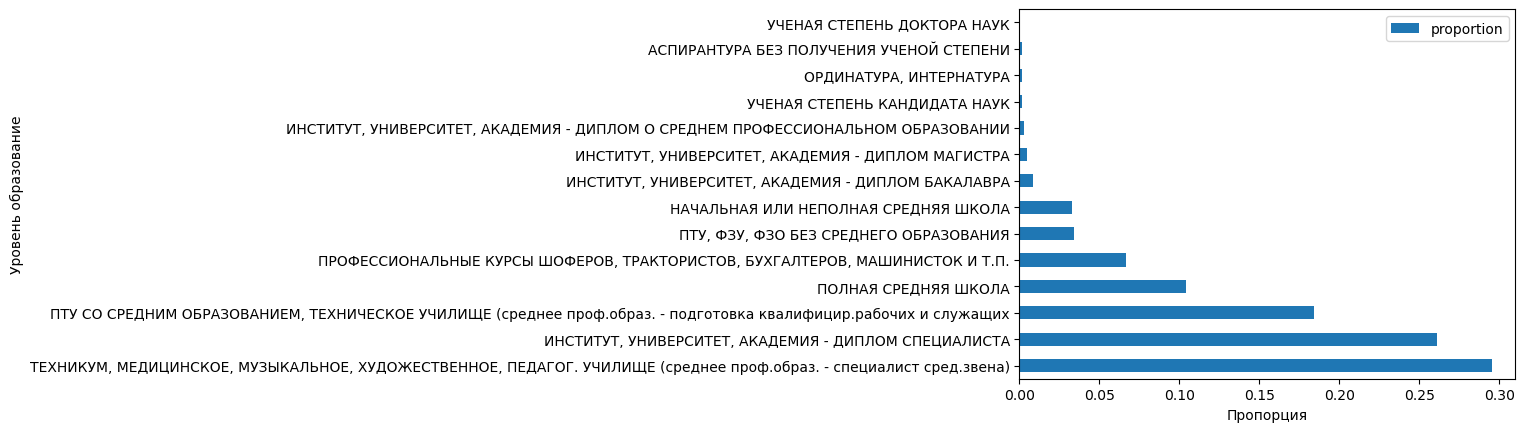

In [461]:
count_belief = pd.DataFrame(data=gen_m_belief['aaj72.18a'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Уровень образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Удовлетворённость доходом'>

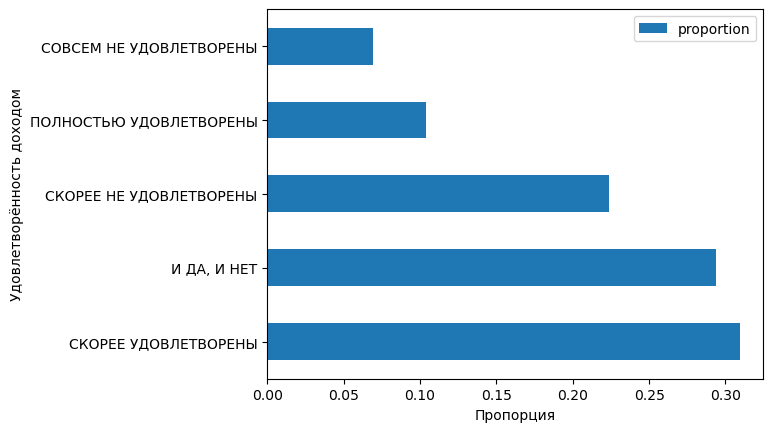

In [462]:
count_belief = pd.DataFrame(data=gen_m_belief['aaj1.1.3'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Удовлетворённость доходом')

# 2.7 База РМЭЗ

Портрет неверующих людей 45-59

<AxesSubplot:xlabel='Пропорция', ylabel='Пол'>

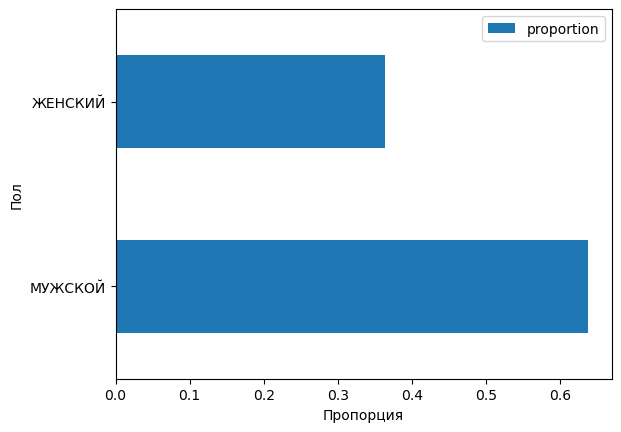

In [463]:
count_belief = pd.DataFrame(data=gen_m_no_belief.aah5.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Пол')

<AxesSubplot:xlabel='Пропорция', ylabel='Образование'>

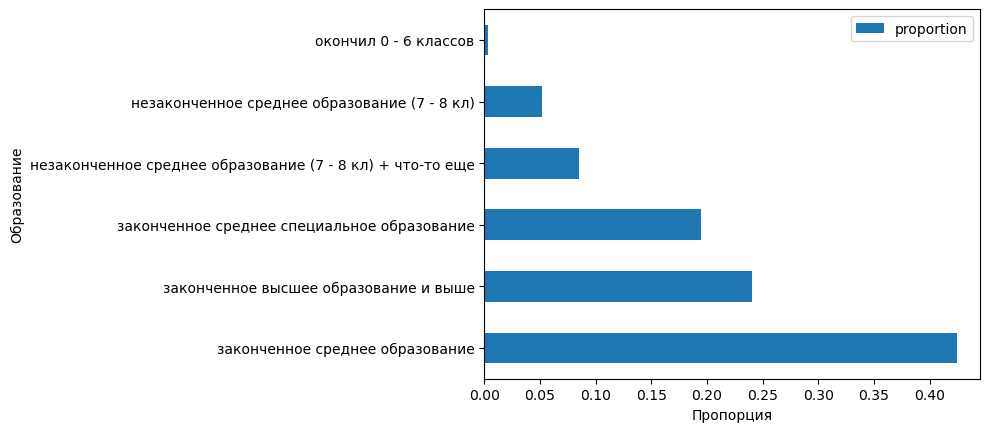

In [464]:
count_belief = pd.DataFrame(data=gen_m_no_belief.aa_diplom.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Тип населённого пункта'>

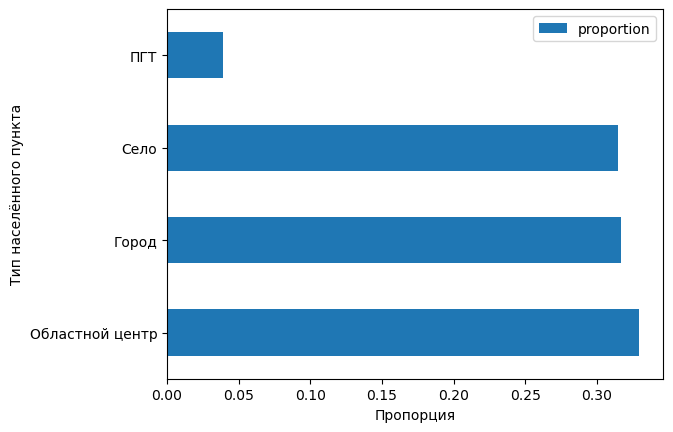

In [465]:
count_belief = pd.DataFrame(data=gen_m_no_belief.status.value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Тип населённого пункта')

<AxesSubplot:xlabel='Пропорция', ylabel='Уровень образование'>

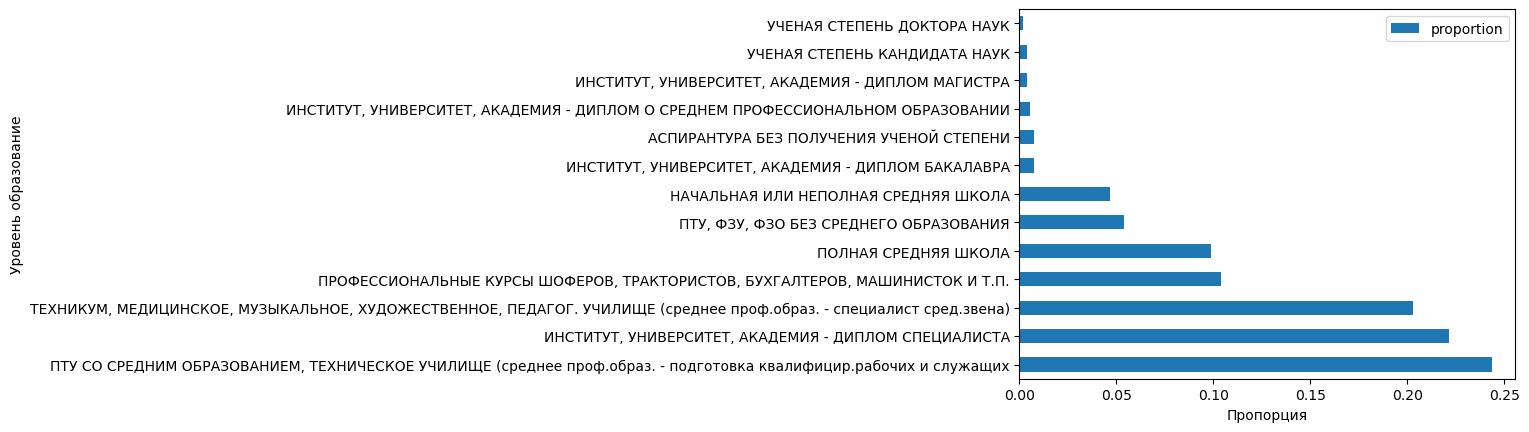

In [466]:
count_belief = pd.DataFrame(data=gen_m_no_belief['aaj72.18a'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Уровень образование')

<AxesSubplot:xlabel='Пропорция', ylabel='Удовлетворённость доходом'>

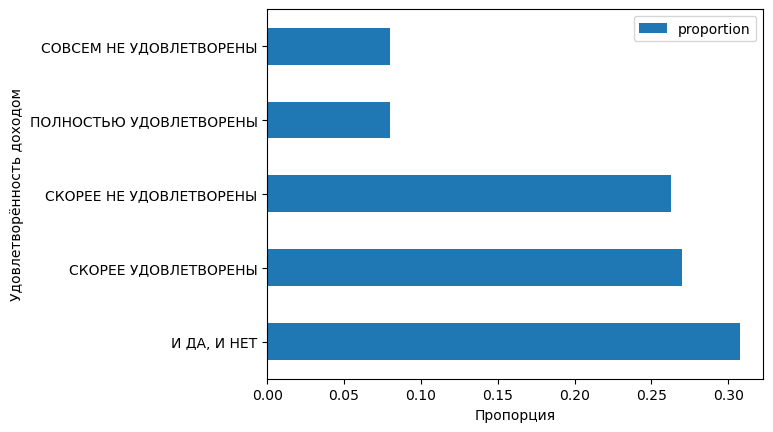

In [467]:
count_belief = pd.DataFrame(data=gen_m_no_belief['aaj1.1.3'].value_counts(normalize=True))

count_belief.plot(kind='barh', xlabel='Пропорция', ylabel = 'Удовлетворённость доходом')